# I- Préparation de données


## 1- Informations sur les données

In [2]:
import os
import pandas
import matplotlib.pyplot as plt
import matplotlib.image as im
print(os.getcwd())
oui =pandas.read_csv("/content/Datasets/Housing/housing.csv")
oui.head(9)

/content


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY


Dans notre cas nous avons un problème de classification, nous avons des données qualitatifs

In [ ]:
oui.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


L'attribut total_bedrooms posséde seulement 20433 valeur alors que tous les autres attributs en on 20640

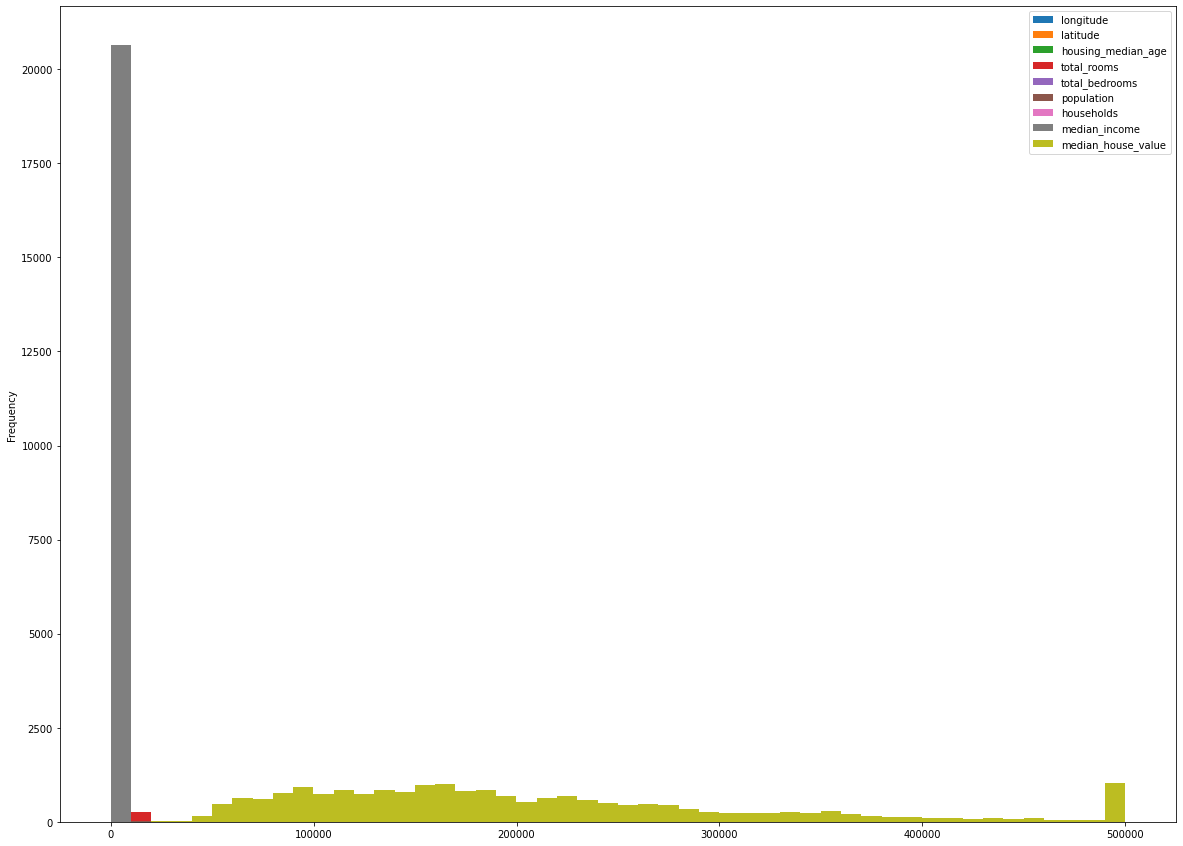

In [ ]:
oui.value_counts("ocean_proximity")
oui.describe()
oui.plot(kind='hist',bins=50,figsize=(20,15))

## 2- Répartition des données

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(oui,train_size=0.8)
X_test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17843,-121.87,37.43,22.0,3805.0,596.0,2118.0,621.0,6.2892,254200.0,<1H OCEAN
17206,-119.72,34.43,27.0,984.0,299.0,777.0,313.0,2.5694,275000.0,<1H OCEAN
7889,-118.05,33.87,18.0,4928.0,773.0,2952.0,754.0,5.8855,313800.0,<1H OCEAN
16187,-121.30,37.96,24.0,1212.0,366.0,1202.0,343.0,1.7875,76800.0,INLAND
9967,-122.47,38.51,18.0,2487.0,516.0,980.0,503.0,3.5506,187500.0,INLAND


## 3- Découverte et visualisation des données

longitude            -0.045967
latitude             -0.144160
housing_median_age    0.105623
total_rooms           0.134153
total_bedrooms        0.049686
population           -0.024650
households            0.065843
median_income         0.688075
median_house_value    1.000000
Name: median_house_value, dtype: float64

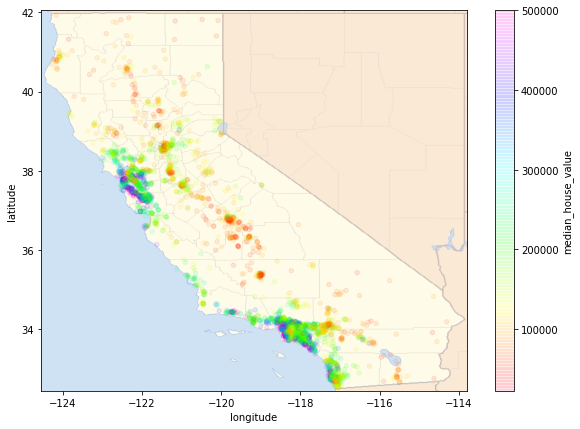

In [ ]:
image = im.imread("/content/Datasets/Housing/california.png")
eheh = X_test.plot("longitude","latitude",kind='scatter',c=("median_house_value"),alpha=0.1,sharex=False,colormap='gist_rainbow', colorbar=True,figsize=(10,7))
eheh = plt.imshow(image, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,cmap=plt.get_cmap("jet"))
oui.corr(method="pearson")["median_house_value"]

On peut remarquer qu'avec la fonction de correlation, l'attribut de median_income est le principale correlateur de l'attribut "median_house_value".

## 4- Nettoyage des données

In [4]:

inp = X_train.drop(labels="median_house_value",axis=1)
out = X_train.copy()["median_house_value"]
inp.fillna(inp.median()["total_bedrooms"],inplace=True)
inp.info(verbose=True)
print(inp.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 15542 to 4425
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
dtype: int64


Problème réglé, total_bedrooms posséde bien 20640 valeur.

In [5]:
from sklearn.preprocessing import OrdinalEncoder
ocean= inp[["ocean_proximity"]]
print(ocean.head(10))
ob = OrdinalEncoder()
inp[["ocean_proximity"]] = ob.fit_transform(ocean)
print(inp.ocean_proximity.head(10))

      ocean_proximity
15542       <1H OCEAN
218          NEAR BAY
9041           INLAND
19303       <1H OCEAN
11351       <1H OCEAN
7036        <1H OCEAN
18114       <1H OCEAN
19208       <1H OCEAN
14054      NEAR OCEAN
6207        <1H OCEAN
15542    0.0
218      3.0
9041     1.0
19303    0.0
11351    0.0
7036     0.0
18114    0.0
19208    0.0
14054    4.0
6207     0.0
Name: ocean_proximity, dtype: float64


# II- Sélection et apprentissage du modèle



## 1- Apprentissage des données

In [6]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(inp,out)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## 2- Evaluation du modèle d'apprentissage sur les données   d'apprentissage


In [7]:
pre = reg.predict(inp)
print(pre);
print(oui.median_house_value)

[374715.36667949 194581.40971212 204894.98971761 ... 138892.40018637
 331985.93757434 117189.82186075]
0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20640, dtype: float64


In [8]:
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
rmse =mean_squared_error(out,pre)
print(sqrt(rmse))

69699.69248979412


In [9]:
tree = DecisionTreeRegressor()
tree =tree.fit(inp,out)
pre2 = tree.predict(inp)
rmse2 =mean_squared_error(out,pre2)
print(sqrt(rmse2))

0.0


In [10]:
from sklearn.model_selection import cross_val_score
valtree = cross_val_score(tree,inp,out,scoring='neg_mean_squared_error',cv=10)
print(valtree)
from statistics import mean
from numpy import std
print("La moyenne des RMSE de tous les folds est de :",mean(valtree))
print("L'écart type de tous les folds est de :",std(valtree))

[-4.49135052e+09 -5.03026152e+09 -4.57223101e+09 -4.81134072e+09
 -4.86116074e+09 -5.30084524e+09 -4.30005684e+09 -4.36957623e+09
 -4.91820309e+09 -4.98709848e+09]
La moyenne des RMSE de tous les folds est de : -4764212438.333306
L'écart type de tous les folds est de : 304344687.3016824


In [11]:
valreg= cross_val_score(reg,inp,out,scoring='neg_mean_squared_error',cv=10)
print(valreg)
print("La moyenne des RMSE de tous les folds est de :",mean(valreg))
print("L'écart type de tous les folds est de :",std(valreg))

[-4.85999671e+09 -4.67463011e+09 -4.70145754e+09 -5.20752488e+09
 -5.19993941e+09 -5.11755419e+09 -4.74984623e+09 -4.78308132e+09
 -4.70951092e+09 -4.95542453e+09]
La moyenne des RMSE de tous les folds est de : -4895896584.017588
L'écart type de tous les folds est de : 199770292.7926927


l'ecart type et la moyenne sont plus faible pour la régression linéaire que pour le DecisionTreeRegressor ce qui n'est pas normal

# III- Fine-tuning

## 1- Grid Search

In [12]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
param_grid= [{'n_estimators': [3,10,30], 'max_features': [2,4,5,8] },]

from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(forest,param_grid,cv=5,scoring='neg_mean_squared_error')
clf = clf.fit(inp,out)
print(clf.best_params_)
pandas.DataFrame(clf.cv_results_)

{'max_features': 5, 'n_estimators': 30}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.085568,0.005434,0.005363,0.000145,2,3,"{'max_features': 2, 'n_estimators': 3}",-3.901126e+09,-3.708721e+09,-4.271899e+09,-3.908235e+09,-4.099560e+09,-3.977908e+09,1.920634e+08,12
1,0.268489,0.004060,0.013055,0.000125,2,10,"{'max_features': 2, 'n_estimators': 10}",-3.084440e+09,-2.750507e+09,-3.138654e+09,-2.844394e+09,-2.881631e+09,-2.939925e+09,1.474999e+08,8
2,0.797322,0.009933,0.035375,0.000482,2,30,"{'max_features': 2, 'n_estimators': 30}",-2.829671e+09,-2.386399e+09,-2.794692e+09,-2.540496e+09,-2.515120e+09,-2.613276e+09,1.709639e+08,4
3,0.137658,0.005301,0.005165,0.000105,4,3,"{'max_features': 4, 'n_estimators': 3}",-3.608739e+09,-3.445994e+09,-3.666301e+09,-3.237029e+09,-3.427261e+09,-3.477065e+09,1.511367e+08,11
4,0.453958,0.006335,0.012949,0.000153,4,10,"{'max_features': 4, 'n_estimators': 10}",-2.884472e+09,-2.511977e+09,-3.010013e+09,-2.577348e+09,-2.487559e+09,-2.694274e+09,2.123682e+08,6
5,1.355251,0.002992,0.035255,0.000437,4,30,"{'max_features': 4, 'n_estimators': 30}",-2.639154e+09,-2.324408e+09,-2.695049e+09,-2.335664e+09,-2.442944e+09,-2.487444e+09,1.534363e+08,2
6,0.166292,0.002890,0.005315,0.000149,5,3,"{'max_features': 5, 'n_estimators': 3}",-3.511576e+09,-3.190132e+09,-3.624863e+09,-3.095617e+09,-3.046907e+09,-3.293819e+09,2.315208e+08,9
7,0.551384,0.011277,0.013044,0.000172,5,10,"{'max_features': 5, 'n_estimators': 10}",-2.774418e+09,-2.490636e+09,-2.942227e+09,-2.567120e+09,-2.588811e+09,-2.672642e+09,1.639044e+08,5
8,1.635700,0.007048,0.035471,0.000423,5,30,"{'max_features': 5, 'n_estimators': 30}",-2.576889e+09,-2.302112e+09,-2.674583e+09,-2.404679e+09,-2.388145e+09,-2.469282e+09,1.359637e+08,1
9,0.251073,0.002351,0.005262,0.000059,8,3,"{'max_features': 8, 'n_estimators': 3}",-3.490512e+09,-3.022922e+09,-3.647647e+09,-3.354913e+09,-3.256606e+09,-3.354520e+09,2.116420e+08,10


## 2- Evaluation du modèle d'apprentissage sur les données de test


In [15]:
inptest = X_test.drop(labels="median_house_value",axis=1)
outtest = X_test.copy()["median_house_value"]
inptest.fillna(inptest.median()["total_bedrooms"],inplace=True)
inptest.info(verbose=True)
oceantest= inptest[["ocean_proximity"]]
obtest = OrdinalEncoder()
inptest[["ocean_proximity"]] = obtest.fit_transform(oceantest)
modapp=clf.best_estimator_
print(modapp)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4128 entries, 17843 to 1772
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           4128 non-null   float64
 1   latitude            4128 non-null   float64
 2   housing_median_age  4128 non-null   float64
 3   total_rooms         4128 non-null   float64
 4   total_bedrooms      4128 non-null   float64
 5   population          4128 non-null   float64
 6   households          4128 non-null   float64
 7   median_income       4128 non-null   float64
 8   ocean_proximity     4128 non-null   object 
dtypes: float64(8), object(1)
memory usage: 322.5+ KB
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=5, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                  

In [19]:
clfTest= clf.fit(inptest, outtest )
predicTest=clfTest.predict(inptest)
print(predicTest)

[257426.66666667 265123.33333333 291260.         ... 181320.
 135990.         103573.33333333]


In [21]:
Rmse = mean_squared_error(outtest,predicTest)
print("La valeur finale du Rmse de notre modéle sur la base de test est de ",Rmse)


La valeur finale du Rmse de notre modéle sur la base de test est de  442646110.27608633
